# Automatic COR finding

### Algorithm 1 ,  hypothesis 1

lets say the real COR is c1 , our goal is to find an algorithm , or a function which can automatically find c1,

COR_finder (COR_first_guess , Slice )  >> c


the first hypothesis is that if we are around c1 the closer we get to c1 the less standard deviation we will have in our reconstructed image.

So naturally , our  first hypothesis could be tested as follow :


reconstruct slices corresponding to :

 c-ne , ... , c  , ... , c+ne   and let be n = 10 . we will get 21 slices, and e is a small difference . e  = 1,10,20

 plot the standard deviation of the image vs, COR . and see if there is a trend .

 if in the first attempt there were no meaningful trens, try to croop the reconstructed slice to the center of the image and a pixel radius of 200px, and repeat the calculation and plot the Std, vs. COR

  the third hypothesis is that we need to filter the reconstructed image using a mean or median filter before calculating the std . please also test if this makes a difference in std. vs COR plot.

find the actual COR of the Image to reconstruct from previous recos.
write a loop that reconstructs and saves the reconstructed slices for C-ne to C+ne for e=1,10,20 and n=10

In [5]:
from reconstruct import * 
from projection_import import * 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import imageio
from scipy.ndimage import median_filter, uniform_filter
import re

In [6]:
# Specify the path to the HDF5 file
file_path = r"C:\Users\gdhakal\Documents\Git\Automatic_COR_finder\C200\2_230110_1200_C200_____Z90_Y6460_50000eV_2x_350ms\2_230110_1200_00001.h5"

# Specify the folder to save and load the TIFF files
tiff_folder = r"C:\Users\gdhakal\Documents\Git\Automatic_COR_finder\Experiment Notebooks\tiffs"

# Create an instance of ProjectionFile
FileObject = ProjectionFile(file_path)

# Open the HDF5 file and retrieve the volume and metadata
volume_path = "/entry/data/data"
metadata_paths = ['/entry/instrument/NDAttributes/CT_MICOS_W']

volume, metadata = FileObject.openFile(volume=volume_path, metadata=metadata_paths)

volume opened successfully : data shape:  (2656, 760, 2560)


### Reconstructing One Slice with Multiple Looped COR

In [ ]:
reco_setting = {
    'angle_list_dir': '/entry/instrument/NDAttributes/CT_MICOS_W',
    'number_of_FFs': 20,
    'slice_number': 400,
    'DarkFieldValue': 200,
    'backIlluminationValue': 0,
    'offset_Angle': 0,
    'angle_range': '180 - axis centered',
    'extend_FOV_fixed_ImageJ_Stream': 0.25,
    'reco_algorithm': 'gridrec',
    'filter_name': 'shepp',
    'pixel_size': 0.72,
    'ring_radius': 50
    }
    

# Specify the values
n = 10
e_values = [1, 10, 20]

# Specify the first COR value (c)
c = 1301.5

cor_values = []
# Loop through the values
for e in e_values:
    for i in range(-n * e, n * e + 1, e):
        cor_value = c + i
        cor_values.append(cor_value)

        # Instantiate the Reconstruction object
        recoObject = Reconstruction(FileObject, gpu=True)
        # Set the COR value in the reconstruction settings
        reco_setting["COR"] = cor_value

        # Generate the Slice using the reco_settings
        slice = recoObject.on_the_fly_one_slice(reco_setting)

        # # Specify the intensity range
        # min_intensity = -100
        # max_intensity = 100

        # # Clip the image intensities within the desired range
        # clipped_image = np.clip(slice, min_intensity, max_intensity)

        # # Scale the intensities to the range [0, 255]
        # scaled_image = ((clipped_image - min_intensity) / (max_intensity - min_intensity) * 255).astype(np.uint8)

        # str_cor_value = str(cor_value).replace ('.' , 'p' )

        # # Save the reconstructed slice
        # save_file_name = f"reconstructed_e{e}_n{n}_cor{str_cor_value}.tif"
        # # np.save(save_file_name, slice)

        # # Save the scaled image as a TIFF file
        # imageio.imwrite(os.path.join(tiff_folder, save_file_name), scaled_image)

        # print("Reconstructed slice saved successfully as", save_file_name)    


In [43]:
#Function to read and give COR, e and n of a file

def parse_reconstructed_filename(filename):
    # Extract COR, e, and n values from the filename using regular expressions
    match = re.search(r"reconstructed_e(\d+)_n(\d+)_cor(\d+p\d+)\.tif", filename)
    
    if match:
        e1 = int(match.group(1))
        n1 = int(match.group(2))
        cor = float(match.group(3).replace("p", "."))
        
        return cor, e, n1
    
    return None

# Initialize arrays to store COR, e, and n values
cor_file = []
e_file = []
path  = []
fname = []

# Iterate over the TIFF files in the directory
for filename in os.listdir(tiff_folder):
    if filename.endswith(".tif"):
        # Get the full file path
        filepath = os.path.join(tiff_folder, filename)
        
        # Parse the COR, e, and n values from the filename
        cor, e1, n1 = parse_reconstructed_filename(filename)
        
        # Append the values to the respective arrays
        cor_file.append(cor)
        e_file.append(e1)
        path.append(filepath)
        fname.append(filename)
        #n_file.append(n1)

# Print the arrays


df_description = pd.DataFrame({"path": path , "filename":fname,"COR":  cor_file , "e": e_file})

print("COR values:", cor_file)
print("e values:", e_file)
#print("n values:", n_file)

COR values: [1201.5, 1211.5, 1221.5, 1231.5, 1241.5, 1251.5, 1261.5, 1271.5, 1281.5, 1291.5, 1301.5, 1311.5, 1321.5, 1331.5, 1341.5, 1351.5, 1361.5, 1371.5, 1381.5, 1391.5, 1401.5, 1291.5, 1292.5, 1293.5, 1294.5, 1295.5, 1296.5, 1297.5, 1298.5, 1299.5, 1300.5, 1301.5, 1302.5, 1303.5, 1304.5, 1305.5, 1306.5, 1307.5, 1308.5, 1309.5, 1310.5, 1311.5, 1101.5, 1121.5, 1141.5, 1161.5, 1181.5, 1201.5, 1221.5, 1241.5, 1261.5, 1281.5, 1301.5, 1321.5, 1341.5, 1361.5, 1381.5, 1401.5, 1421.5, 1441.5, 1461.5, 1481.5, 1501.5]
e values: [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


In [44]:
df_description

,path,filename,COR,e
0,C:\Users\gdhakal\Documents\Git\Automatic_COR_f...,reconstructed_e10_n10_cor1201p5.tif,1201.5,20
1,C:\Users\gdhakal\Documents\Git\Automatic_COR_f...,reconstructed_e10_n10_cor1211p5.tif,1211.5,20
2,C:\Users\gdhakal\Documents\Git\Automatic_COR_f...,reconstructed_e10_n10_cor1221p5.tif,1221.5,20
3,C:\Users\gdhakal\Documents\Git\Automatic_COR_f...,reconstructed_e10_n10_cor1231p5.tif,1231.5,20
4,C:\Users\gdhakal\Documents\Git\Automatic_COR_f...,reconstructed_e10_n10_cor1241p5.tif,1241.5,20
...,...,...,...,...
58,C:\Users\gdhakal\Documents\Git\Automatic_COR_f...,reconstructed_e20_n10_cor1421p5.tif,1421.5,20
59,C:\Users\gdhakal\Documents\Git\Automatic_COR_f...,reconstructed_e20_n10_cor1441p5.tif,1441.5,20
60,C:\Users\gdhakal\Documents\Git\Automatic_COR_f...,reconstructed_e20_n10_cor1461p5.tif,1461.5,20
61,C:\Users\gdhakal\Documents\Git\Automatic_COR_f...,reconstructed_e20_n10_cor1481p5.tif,1481.5,20


In [31]:
# compression_opts = dict(method='zip',
#                         archive_name='out.csv')  
# df_description.to_csv('out.zip', index=False,
#           compression=compression_opts)  

### Experiment One - Finding Standard Deviation and Plotting It

In [37]:
#df_description.drop(columns=['std_dev'])

In [47]:
# Function to calculate standard deviation
def calculate_std(path):
    image = Image.open(path)  # Read the image based on the filename
    image_array = np.array(image)
    std = np.std(image_array)
    return std

# Apply the function to calculate standard deviation for each file
df_description['std_dev'] = df_description['path'].apply(calculate_std)

# Print the updated DataFrame
#print(df_description)

                                                 path  \
0   C:\Users\gdhakal\Documents\Git\Automatic_COR_f...   
1   C:\Users\gdhakal\Documents\Git\Automatic_COR_f...   
2   C:\Users\gdhakal\Documents\Git\Automatic_COR_f...   
3   C:\Users\gdhakal\Documents\Git\Automatic_COR_f...   
4   C:\Users\gdhakal\Documents\Git\Automatic_COR_f...   
..                                                ...   
58  C:\Users\gdhakal\Documents\Git\Automatic_COR_f...   
59  C:\Users\gdhakal\Documents\Git\Automatic_COR_f...   
60  C:\Users\gdhakal\Documents\Git\Automatic_COR_f...   
61  C:\Users\gdhakal\Documents\Git\Automatic_COR_f...   
62  C:\Users\gdhakal\Documents\Git\Automatic_COR_f...   

                               filename     COR   e    std_dev  
0   reconstructed_e10_n10_cor1201p5.tif  1201.5  20  12.593179  
1   reconstructed_e10_n10_cor1211p5.tif  1211.5  20  12.598866  
2   reconstructed_e10_n10_cor1221p5.tif  1221.5  20  12.603306  
3   reconstructed_e10_n10_cor1231p5.tif  1231.5  20  12

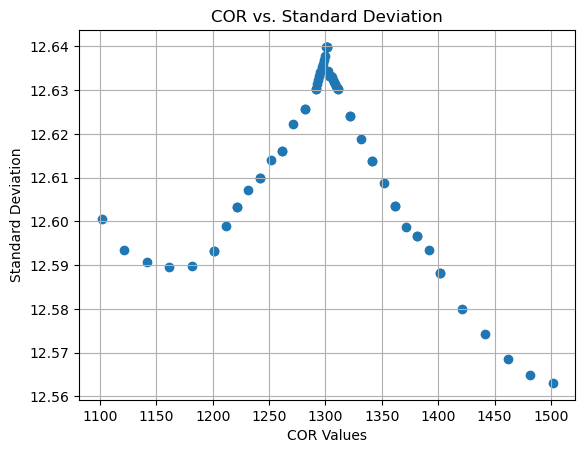

In [49]:
plt.scatter(df_description["COR"],df_description["std_dev"])
plt.xlabel('COR Values')
plt.ylabel('Standard Deviation')
plt.title('COR vs. Standard Deviation')
plt.grid(True)
plt.show()

### To Be Continued

In [13]:
# Calculate the standard deviation of the TIFF files
standard_deviations = []

# Initialize variables
smallest_std_dev = float('inf')
largest_std_dev = 0
smallest_file = ""
largest_file = ""

for fname in os.listdir(tiff_folder):
    im = Image.open(os.path.join(tiff_folder, fname))
    imarray = np.array(im)
    std_dev = np.std(imarray)
    standard_deviations.append(std_dev)

    if std_dev < smallest_std_dev:
        smallest_std_dev = std_dev
        smallest_file = fname
    if std_dev > largest_std_dev:
        largest_std_dev = std_dev
        largest_file = fname

    #print(f"Standard Deviation of {fname}: {std_dev}")

print("File with Minimum Standard Deviation: ", smallest_file, "With Deviation: ", smallest_std_dev )
print("File with Maximum Standard Deviation:", largest_file, "With Deviation:", largest_std_dev)


# Calculate the overall standard deviation
overall_std_dev = np.std(standard_deviations)

print("Individual Standard Deviations:", standard_deviations)
print("Overall Standard Deviation:", overall_std_dev)

File with Minimum Standard Deviation:  reconstructed_e20_n10_cor1501p5.tif With Deviation:  12.563050595548342
File with Maximum Standard Deviation: reconstructed_e1_n10_cor1300p5.tif With Deviation: 12.639882952244747
Individual Standard Deviations: [12.593178649343624, 12.598866149389805, 12.603306304610362, 12.607078150282597, 12.609905605451788, 12.614021630113319, 12.616194409344521, 12.62221584549683, 12.625680567518158, 12.630285739010917, 12.63979708266618, 12.630326339892664, 12.62405200907037, 12.618795307241966, 12.613882361212545, 12.608791410957197, 12.603495923725726, 12.598819137259934, 12.59668929357042, 12.593425017828249, 12.588255637038126, 12.630285739010917, 12.631454877293404, 12.63242577982448, 12.633336507967254, 12.634096267883308, 12.63517964183158, 12.635968376889444, 12.637004403228476, 12.637798368091214, 12.639882952244747, 12.63979708266618, 12.63443270353419, 12.63317226929346, 12.633334836066586, 12.633024035192586, 12.632410148175959, 12.63176059623995

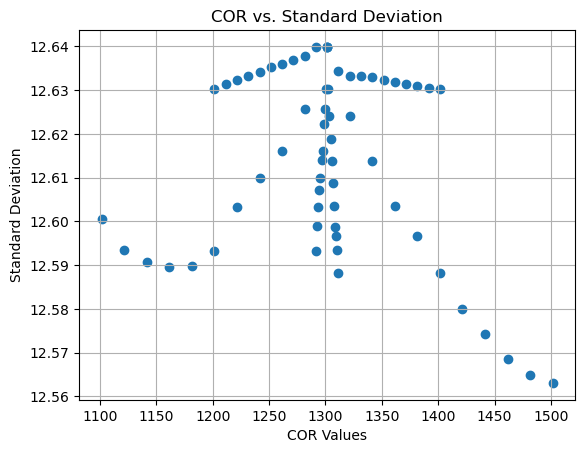

In [22]:
#Plotting the COR with Standard Deviations
plt.scatter(cor_values, standard_deviations, marker='o')
plt.xlabel('COR Values')
plt.ylabel('Standard Deviation')
plt.title('COR vs. Standard Deviation')
plt.grid(True)
plt.show()

### Experiment Two - Center Cropped Tiff With Pixel Radius 200px

In [16]:
#Cropping the Tiff files to 200px from center and finding the SD

# Calculate the standard deviation of the TIFF files
cropped_standard_deviations = []

# Initialize variables
c_smallest_std_dev = float('inf')
c_largest_std_dev = 0
c_smallest_file = ""
c_largest_file = ""

for c_fname in os.listdir(tiff_folder):
    im = Image.open(os.path.join(tiff_folder, c_fname))
    width, height = im.size
    left = (width - 200) // 2
    top = (height - 200) // 2
    right = left + 200
    bottom = top + 200
    cropped_image = im.crop((left, top, right, bottom))

    imarray = np.array(cropped_image)
    c_std_dev = np.std(imarray)
    cropped_standard_deviations.append(c_std_dev)

    if c_std_dev < c_smallest_std_dev:
        c_smallest_std_dev = c_std_dev
        c_smallest_file = c_fname
    if c_std_dev > c_largest_std_dev:
        c_largest_std_dev = c_std_dev
        c_largest_file = c_fname

print("File with Minimum Standard Deviation: ", c_smallest_file, "With Deviation: ", c_smallest_std_dev )
print("File with Maximum Standard Deviation:", c_largest_file, "With Deviation:", c_largest_std_dev)
print("Individual Standard Deviations:", cropped_standard_deviations)


File with Minimum Standard Deviation:  reconstructed_e20_n10_cor1501p5.tif With Deviation:  17.28994461233176
File with Maximum Standard Deviation: reconstructed_e20_n10_cor1181p5.tif With Deviation: 18.756361229443602
Individual Standard Deviations: [18.722842678113146, 18.55194557014169, 18.543521255936668, 18.393137823655866, 18.28509559653367, 18.26978157694763, 18.545351087536734, 18.506836694516434, 18.53981128057605, 18.6259400664604, 18.666244004469004, 18.60758465517153, 18.46766735471416, 18.409980815290794, 18.516189591662076, 18.49748741341307, 18.37682621331483, 18.30122941524353, 18.283551143702226, 18.170525286779686, 17.91017865879623, 18.6259400664604, 18.62702921091753, 18.648557406924937, 18.65634418361486, 18.64041362731793, 18.652585771666484, 18.657417239381633, 18.66867191145369, 18.68365198440538, 18.684847424433922, 18.666244004469004, 18.653822729872285, 18.645227602777474, 18.644313723877715, 18.629815304220678, 18.635062499744265, 18.638320252221632, 18.6248

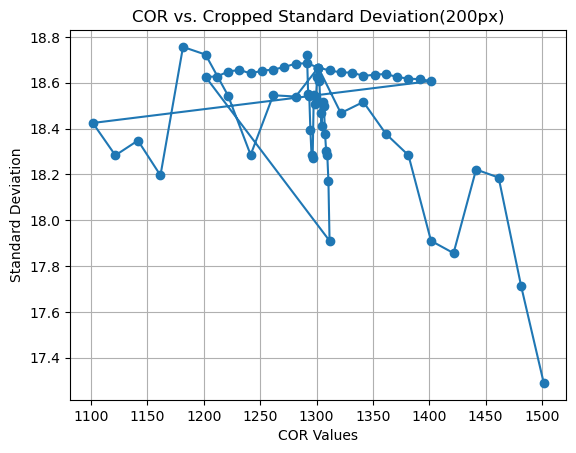

In [17]:
#Plotting the COR with Cropped Standard Deviations
plt.plot(cor_values, cropped_standard_deviations, marker='o')
plt.xlabel('COR Values')
plt.ylabel('Standard Deviation')
plt.title('COR vs. Cropped Standard Deviation(200px)')
plt.grid(True)
plt.show()

### Experiment Three - Using Mean and Median Filter

In [18]:
# Mean Filter

# Calculate the standard deviation of the TIFF files
mean_standard_deviations = []

# Initialize variables
mean_smallest_std_dev = float('inf')
mean_largest_std_dev = 0
mean_smallest_file = ""
mean_largest_file = ""

for mean_fname in os.listdir(tiff_folder):
    im = Image.open(os.path.join(tiff_folder, fname))

    # Apply mean filter
    mean_filtered = uniform_filter(im, size=3) 

    imarray = np.array(mean_filtered)
    mean_std_dev = np.std(imarray)
    mean_standard_deviations.append(mean_std_dev)

    if mean_std_dev < mean_smallest_std_dev:
        mean_smallest_std_dev = mean_std_dev
        mean_smallest_file = mean_fname
    if mean_std_dev > mean_largest_std_dev:
        mean_largest_std_dev = mean_std_dev
        mean_largest_file = fname

    #print(f"Standard Deviation of {fname}: {std_dev}")

print("File with Minimum Standard Deviation: ", mean_smallest_file, "With Deviation: ", mean_smallest_std_dev )
print("File with Maximum Standard Deviation:", mean_largest_file, "With Deviation:", mean_largest_std_dev)

print("Individual Standard Deviations:", mean_standard_deviations)


File with Minimum Standard Deviation:  reconstructed_e10_n10_cor1201p5.tif With Deviation:  11.32001304356124
File with Maximum Standard Deviation: reconstructed_e20_n10_cor1501p5.tif With Deviation: 11.32001304356124
Individual Standard Deviations: [11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001304356124, 11.32001

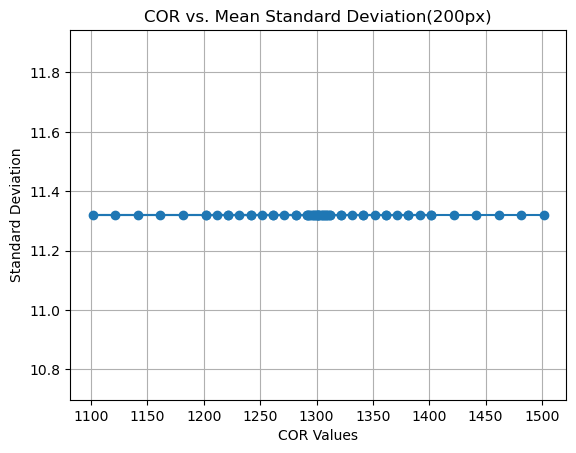

In [19]:
#Plotting the COR with Mean Standard Deviations
plt.plot(cor_values, mean_standard_deviations, marker='o')
plt.xlabel('COR Values')
plt.ylabel('Standard Deviation')
plt.title('COR vs. Mean Standard Deviation(200px)')
plt.grid(True)
plt.show()

In [20]:
# Median Filter
median_standard_deviations = []

# Initialize variables
median_smallest_std_dev = float('inf')
median_largest_std_dev = 0
median_smallest_file = ""
median_largest_file = ""

for median_fname in os.listdir(tiff_folder):
    im = Image.open(os.path.join(tiff_folder, fname))

    # Apply median filter
    median_filtered = median_filter(im, size=3)

    imarray = np.array(median_filtered)
    median_std_dev = np.std(imarray)
    median_standard_deviations.append(median_std_dev)

    if median_std_dev < median_smallest_std_dev:
        median_smallest_std_dev = median_std_dev
        median_smallest_file = median_fname
    if median_std_dev > median_largest_std_dev:
        median_largest_std_dev = median_std_dev
        median_largest_file = median_fname

print("File with Minimum Standard Deviation: ", median_smallest_file, "With Deviation: ", median_smallest_std_dev )
print("File with Maximum Standard Deviation:", median_largest_file, "With Deviation:", median_largest_std_dev)


print("Individual Standard Deviations:", median_standard_deviations)


File with Minimum Standard Deviation:  reconstructed_e10_n10_cor1201p5.tif With Deviation:  11.689015799039451
File with Maximum Standard Deviation: reconstructed_e10_n10_cor1201p5.tif With Deviation: 11.689015799039451
Individual Standard Deviations: [11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.689015799039451, 11.6890

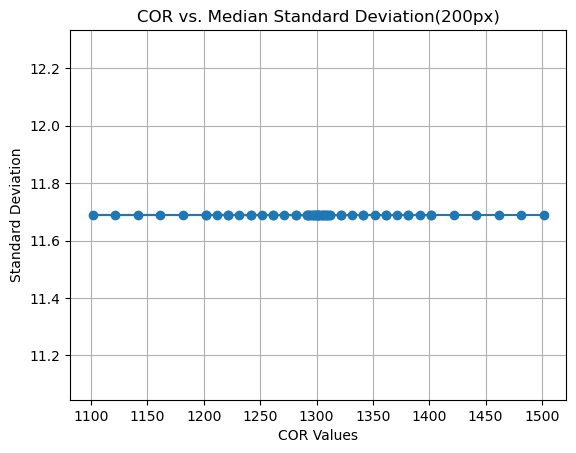

In [21]:
#Plotting the COR with Median Standard Deviations
plt.plot(cor_values, median_standard_deviations, marker='o')
plt.xlabel('COR Values')
plt.ylabel('Standard Deviation')
plt.title('COR vs. Median Standard Deviation(200px)')
plt.grid(True)
plt.show()